In [31]:
# import library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data, EDA, dan Data Cleansing

In [32]:
df=pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [33]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [35]:
# Mengecek apakah ada data yang kosong
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Bagaimana perubahan jumlah kasus kriminal di Kota London dari tahun 2008 - 2016?

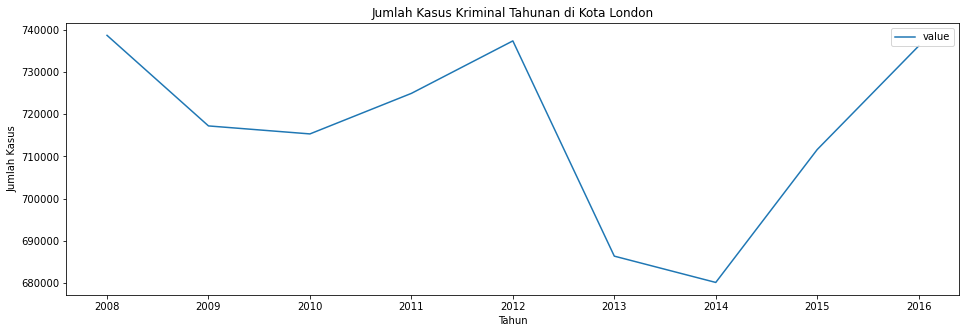

In [75]:
# statistik jumlah kasus tahunan
df.groupby('year').value.sum().plot(kind='line',figsize=(16,5));

plt.title('Jumlah Kasus Kriminal Tahunan di Kota London');
plt.xlabel('Tahun');
plt.ylabel('Jumlah Kasus');
plt.legend();

- Dapat dilihat dari grafik diatas bahwa terjadi penurunan angka kasus kriminal secara drastis dari tahun 2012 - 2014 sebelum akhirnya mulai naik kembali di tahun 2016

### Bagaimana grafik kasus kriminal di Kota London dari tahun 2008 - 2016 setiap akhir tahun?

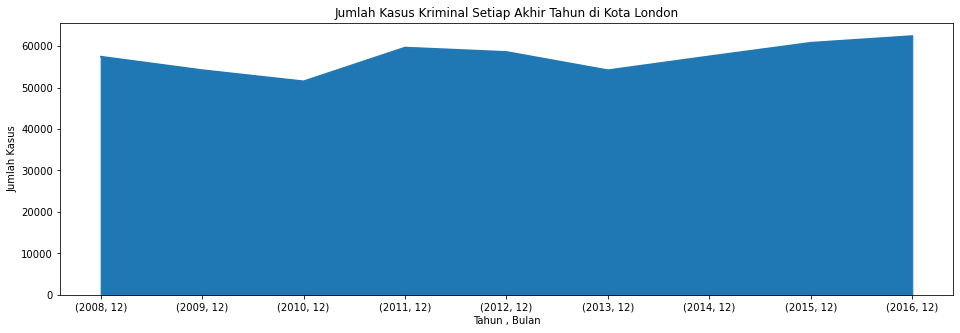

In [146]:
kondisi=df['month']==12
df[kondisi].groupby(['year','month']).value.sum().plot(kind='area',figsize=(16,5));

plt.title('Jumlah Kasus Kriminal Setiap Akhir Tahun di Kota London');
plt.xlabel('Tahun , Bulan');
plt.ylabel('Jumlah Kasus');

- Dari grafik diatas, terlihat tidak banyak terjadi perubahan angka kasus kriminal yang terjadi setiap akhir tahun

### Wilayah mana yang memiliki kasus kriminal terbanyak dari tahun 2008 - 2016?

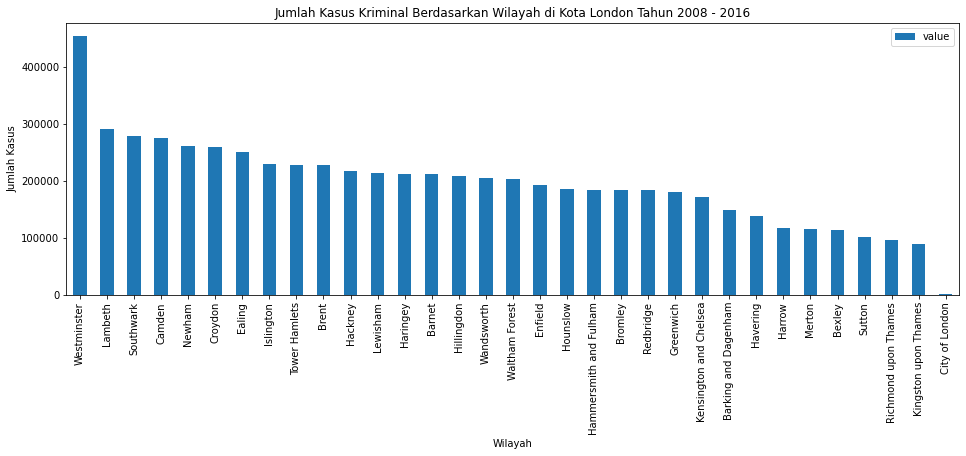

In [37]:
# statisik jumlah kasus per wilayah
df_borough=df.groupby('borough').value.sum().sort_values(ascending=False)
df_borough.plot(kind='bar',figsize=(16,5));

plt.title('Jumlah Kasus Kriminal Berdasarkan Wilayah di Kota London Tahun 2008 - 2016');
plt.xlabel('Wilayah');
plt.ylabel('Jumlah Kasus');
plt.legend();

- Dari grafik diatas dapat dilihat bahwa wilayah Westminster merupakan wilayah yang memiliki jumlah kasus terbanyak dengan selisih yang cukup besar dengan wilayah Lambeth dan Southwark di peringkat 2 dan 3.
- Yang perlu diperhatikan juga pada wilayah City of London yang selama 8 tahun hampir tidak memiliki kasus kriminal 

### Bagaimana distribusi frekuensi kasus kriminal di Kota London wilayah Sutton pada tahun 2016?

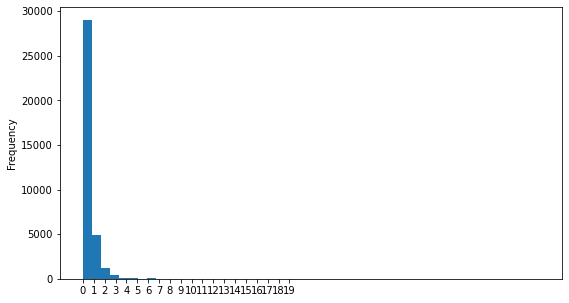

In [74]:
kondisi=(df['year']==2016) & (df['borough']=='Sutton')
df[kondisi].value.plot(kind='hist',figsize=(9,5),bins=50);

plt.xticks(np.arange(0,20,1));

- Dari grafik diatas, terlihat bahwa wilayah Sutton memiliki jumlah kasus kriminal 0 sampai 1 dalam satu periode dengan frekuensi yang cukup besar.

### Berapa persentase setiap kategori major kasus kriminal yang terjadi di Tahun 2016?

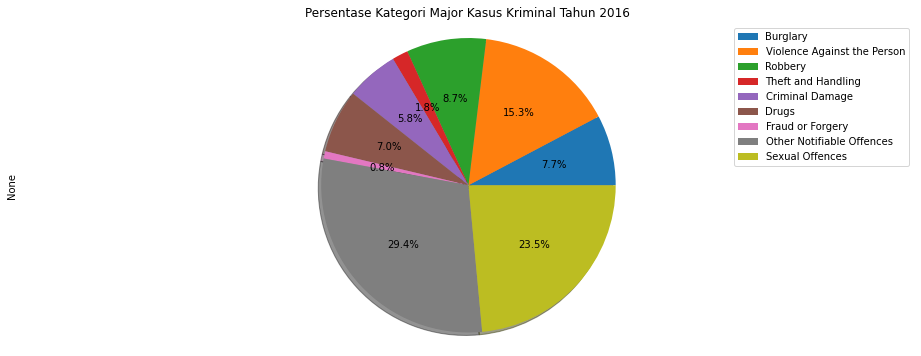

In [39]:
tahun=df['year']==2016
major_cat=df.major_category.unique()

df[tahun].groupby(['major_category']).size().plot(kind="pie",figsize=(16,6), autopct="%.1f%%",labels=None,shadow=True);

plt.title('Persentase Kategori Major Kasus Kriminal Tahun 2016');
plt.axis('equal');
plt.legend(major_cat);

- Berdasarkan grafik diatas, pada tahun 2016 Kasus Pelanggaran Seksual memliki jumlah yang dominan dibanding kategori major lainnya. Bahkan persentasenya hampir sama besar dengan kategori major kasus lainnya.

### Ketika kasus narkoba menjadi kategori major, ada berapa jumlah kasus kriminal yang terjadi setiap bulannya di tahun 2012?

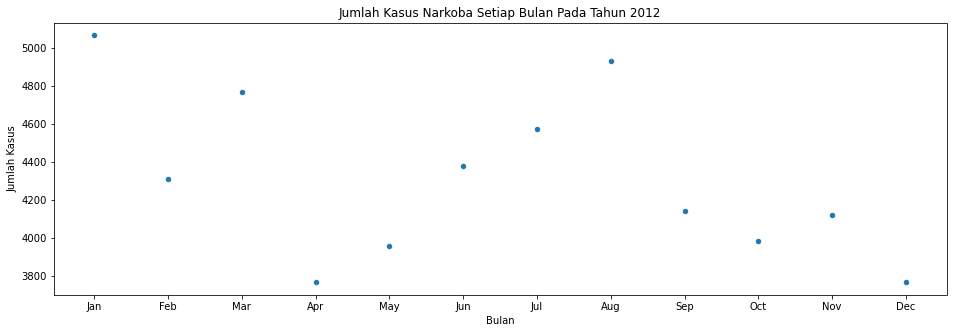

In [40]:
kondisi=(df['major_category']=='Drugs') & (df['year']==2012)
df_drugs=df.loc[kondisi]
df_drugs.groupby(['month']).value.sum().to_frame().reset_index().plot(kind='scatter',figsize=(16,5),x='month',y='value');

plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.title('Jumlah Kasus Narkoba Setiap Bulan Pada Tahun 2012');
plt.xlabel('Bulan');
plt.ylabel('Jumlah Kasus');

- Dari grafik di atas, terlihat ketika kasus narkoba sebaga kategori major jumlah kasus di tahun 2012 memiliki jumlah yang tinggi di awal tahun sedangkan di akhir tahun memiliki jumlah yang rendah

### Bagaimana box plot angka kasus kriminal di wilayah Westminster dari tahun 2008 - 2016?

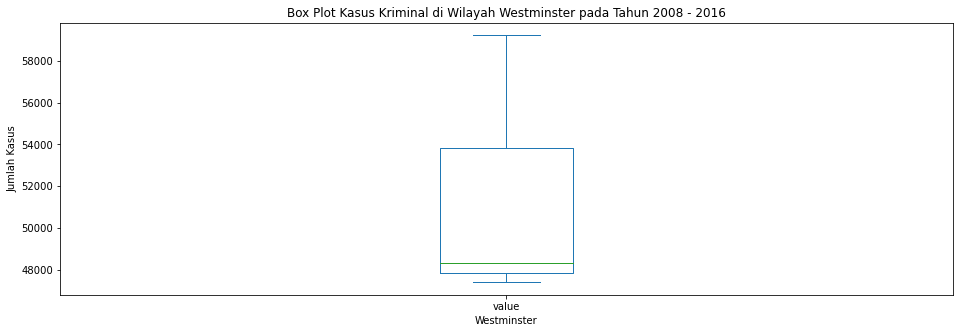

In [77]:
kondisi=(df['borough']=='Westminster')
df_robbery=df.loc[kondisi].groupby(['year']).value.sum().to_frame()
df_robbery.plot(kind='box',figsize=(16,5));

plt.title('Box Plot Kasus Kriminal di Wilayah Westminster pada Tahun 2008 - 2016');
plt.xlabel('Westminster');
plt.ylabel('Jumlah Kasus');

- Dari grafik box plot diatas, dapat dilihat bahwa kasus kriminal yang terjadi di wilayah Westminster memiliki angka tertinggi di sekitar 54000 kasus dalam satu tahun. Sedangkan nilai tengah nya berada di sekitar 48000 kasus per tahun.